In [9]:
# LOADING THE REQUIRED LIBRARIES
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, MaxPooling2D, Add, Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn as nn

In [16]:
#load the cifar10 dataset and split into training and testing
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#display shape of training and testing datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

#Labels of dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [17]:
#Preprocessing the data

# Scaling the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transforming target variable
y_categorical_train = to_categorical(y_train, 10)
y_categorical_test = to_categorical(y_test, 10)

In [21]:
def resnet(x, filters, kernel_size=3, stride=1, downsample=False):
    
    #skip connection
    skip_connection = x
    # First convolutional layer
    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    
    if downsample or stride != 1:
        skip_connection = Conv2D(filters, kernel_size=1, strides=stride, padding='same', use_bias=False)(skip_connection)
        skip_connection = BatchNormalization()(skip_connection)
    
    return x

#Resnet Model

inputs = Input(shape=(32, 32, 3))

# First convolution layer
x = Conv2D(64, kernel_size=3, strides=1, padding='same')(inputs)
x = BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

# Layer 1 with 64 filters
x = resnet(x, 64)
x = resnet(x, 64)

# Layer 2 with 128 filters
x = resnet(x, 128, stride=2, downsample=True)
x = resnet(x, 128)

# Layer 3 with 256 filters
x = resnet(x, 256, stride=2, downsample=True)
x = resnet(x, 256)

# Layer 4 with 512 filters
x = resnet(x, 512, stride=2, downsample=True)
x = resnet(x, 512)

# Global average pooling and fully connected layer
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

# Create the model
model2 = Model(inputs=inputs, outputs=outputs)

optimizer = Adam(learning_rate=0.001)
metric = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

# Compile the model
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

# Print model summary
model2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_51 (ReLU)                 │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_103         │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_52 (ReLU)                 │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_104         │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_105         │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_53 (ReLU)                 │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_106         │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_107         │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_54 (ReLU)                 │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_108         │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 11,073,674 (42.24 MB)

 Trainable params: 11,065,866 (42.21 MB)

 Non-trainable params: 7,808 (30.50 KB)

In [22]:
#setting the batch size
batch_size = 32

#split training data again for hyper parameter optimization
#data augmentation using ImageDataGenerator
aug_data = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

#generate batches of augmented data using flow
batch_data = aug_data.flow(x_train, y_categorical_train, batch_size)

#number of steps for each epoch
steps_per_epoch = x_train.shape[0] // batch_size

#training the model with the batch_data
r = model2.fit(batch_data,
              epochs=10,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_categorical_test)
             )

Epoch 1/10


C:\Users\gomez\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 586s 371ms/step - accuracy: 0.3101 - loss: 1.8608 - precision: 0.4760 - recall: 0.0737 - val_accuracy: 0.4205 - val_loss: 1.6845 - val_precision: 0.5345 - val_recall: 0.3041
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 10:15 394ms/step - accuracy: 0.4062 - loss: 1.7440 - precision: 0.5000 - recall: 0.1250

C:\Users\gomez\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4062 - loss: 1.7440 - precision: 0.5000 - recall: 0.1250 - val_accuracy: 0.4118 - val_loss: 1.6688 - val_precision: 0.5325 - val_recall: 0.2864
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 599s 383ms/step - accuracy: 0.4987 - loss: 1.4119 - precision: 0.7037 - recall: 0.2850 - val_accuracy: 0.4593 - val_loss: 1.5693 - val_precision: 0.6109 - val_recall: 0.3228
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5938 - loss: 1.2754 - precision: 0.8462 - recall: 0.3438 - val_accuracy: 0.4493 - val_loss: 1.6035 - val_precision: 0.5996 - val_recall: 0.3170
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4231s 3s/step - accuracy: 0.5657 - loss: 1.2215 - precision: 0.7533 - recall: 0.3901 - val_accuracy: 0.4938 - val_loss: 1.6075 - val_precision: 0.5823 - val_recall: 0.4325
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5938 - loss: 1.0337 - precision: 0.7895 - recall: 0.4688 - val_accuracy: 0.4832 - v

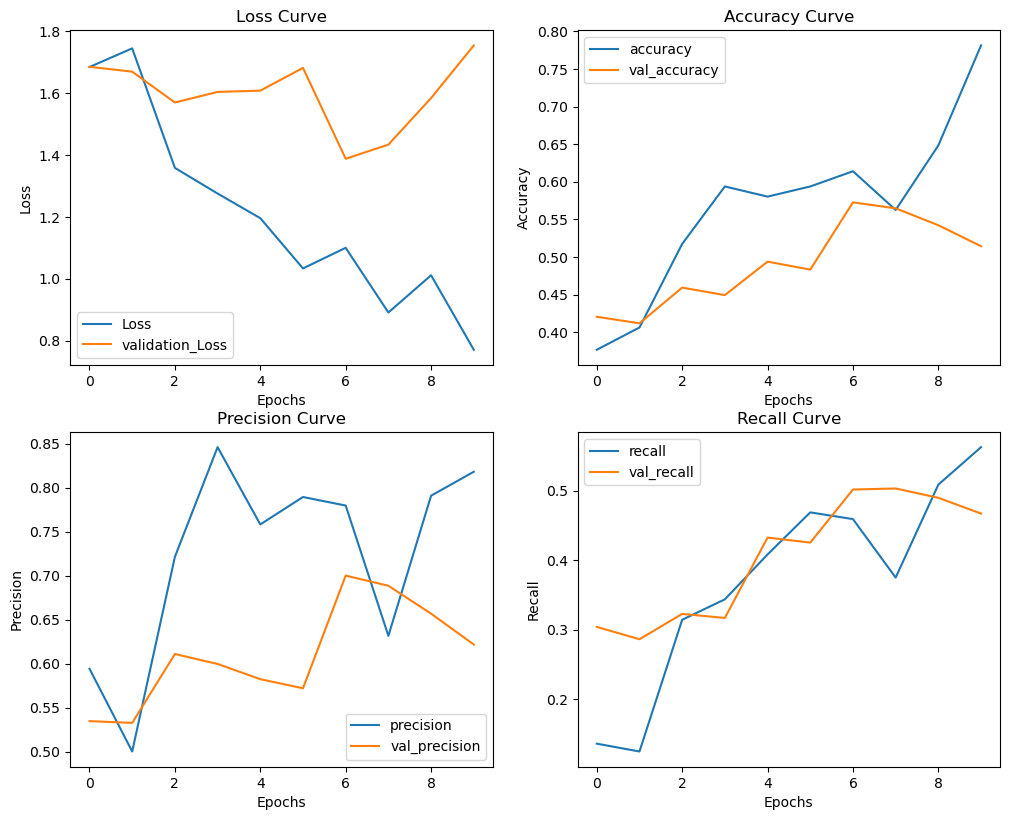

In [25]:
#setting the figure size
plt.figure(figsize=(12, 20))

#Loss vs Epoch
plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='validation_Loss')
plt.title('Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

#Accuracy vs Epoch
plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

#Precision vs Epoch
plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Curve')
plt.ylabel('Precision')
plt.xlabel('Epochs')
plt.legend()

#Recall vs Epoch
plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Curve')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step


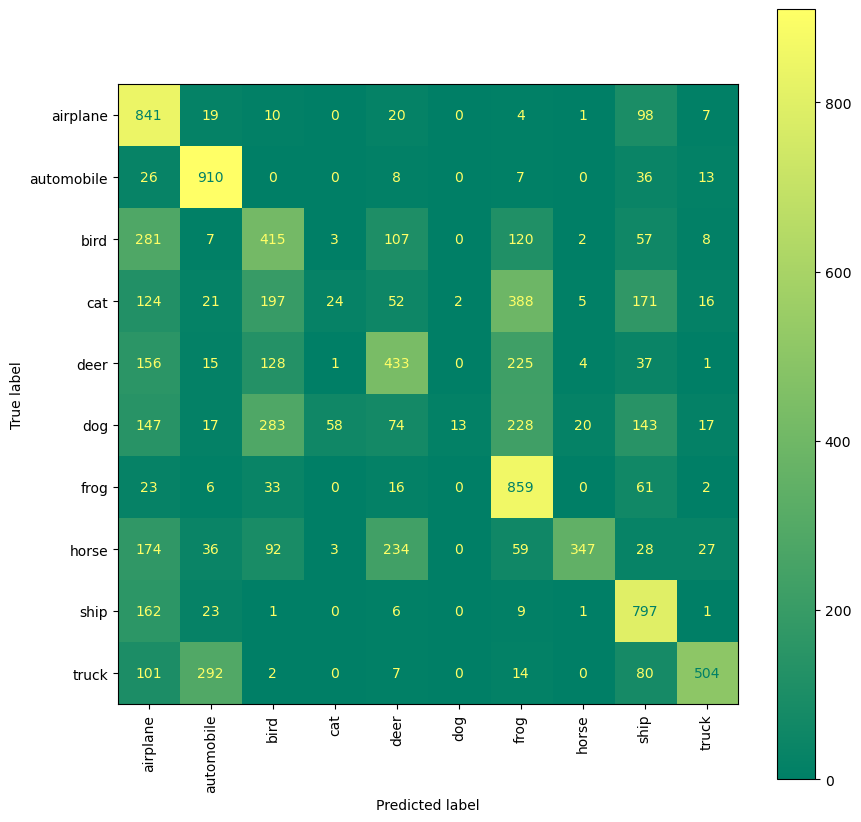

In [26]:
#use the model to predicts of test dataset
y_prediction = model2.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=1)

#confusion_matrix
conf_matrix = confusion_matrix(y_test, y_prediction)

#confusion matrix with labels
conf_matrix_with_labels = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=labels)



fig, ax = plt.subplots(figsize=(10, 10))
conf_matrix_with_labels = conf_matrix_with_labels.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [27]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.41      0.84      0.55      1000
           1       0.68      0.91      0.78      1000
           2       0.36      0.41      0.38      1000
           3       0.27      0.02      0.04      1000
           4       0.45      0.43      0.44      1000
           5       0.87      0.01      0.03      1000
           6       0.45      0.86      0.59      1000
           7       0.91      0.35      0.50      1000
           8       0.53      0.80      0.64      1000
           9       0.85      0.50      0.63      1000

    accuracy                           0.51     10000
   macro avg       0.58      0.51      0.46     10000
weighted avg       0.58      0.51      0.46     10000

